In [1]:
import zipfile

In [3]:
file = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/TMINST/TMNIST_Data.csv.zip", "r")
file.extractall()
file.close()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [9]:
df = pd.read_csv("/content/TMNIST_Data.csv")
df.head()

,names,labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
names = df["names"].to_numpy()
names

array(['GrandHotel-Regular', 'EncodeSansCondensed-Medium',
       'Varela-Regular', ..., 'BigShouldersStencilDisplay-Black',
       'Gabriela-Regular', 'Ovo-Regular'], dtype=object)

In [20]:
df["labels"]

0        2
1        8
2        4
3        3
4        1
        ..
29895    7
29896    5
29897    0
29898    1
29899    6
Name: labels, Length: 29900, dtype: int64

In [21]:
df.drop("names", axis = 1, inplace = True)

In [22]:
df.head()

,labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
x = df.drop("labels", axis = 1)
y = df["labels"]

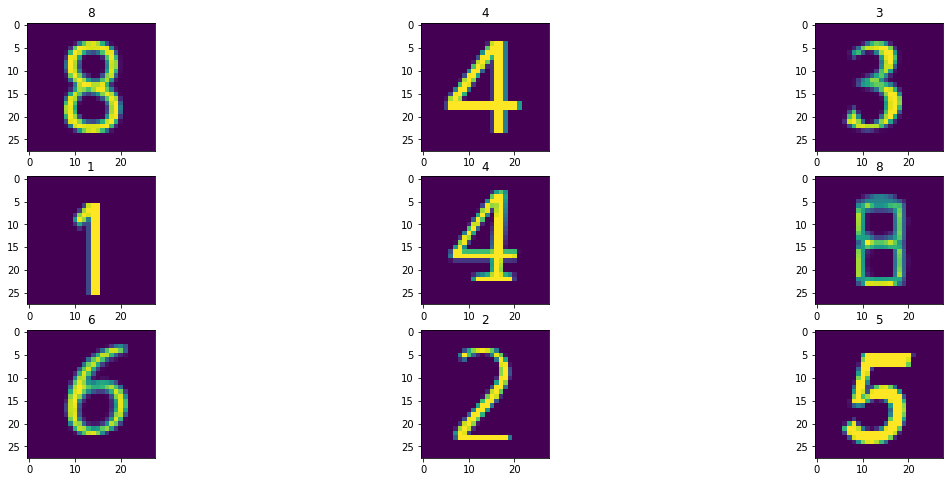

In [26]:
plt.figure(figsize = (20, 8))
for i in range(1, 10):

  plt.subplot(3, 3, i)
  plt.imshow(x.iloc[i, :].values.reshape(28, 28))
  plt.title(y[i])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, test_size = 0.3) 

In [29]:
xtrain = xtrain.values.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.values.reshape(xtest.shape[0], 28, 28, 1)

ytrain = pd.get_dummies(ytrain)
ytest = pd.get_dummies(ytest)

In [30]:
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [31]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding= 'same', activation='relu',
                    input_shape = (28,28,1)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    return model

model = createModel()
batch_size = 256
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [32]:
history = model.fit(xtrain, ytrain, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(xtest, ytest))
model.evaluate(xtest, ytest)

Epoch 1/10
82/82 [==============================] - 13s 30ms/step - loss: 1.5886 - accuracy: 0.4801 - val_loss: 0.1302 - val_accuracy: 0.9654
Epoch 2/10
82/82 [==============================] - 1s 18ms/step - loss: 0.2038 - accuracy: 0.9384 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 3/10
82/82 [==============================] - 2s 18ms/step - loss: 0.1154 - accuracy: 0.9675 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 4/10
82/82 [==============================] - 2s 19ms/step - loss: 0.0848 - accuracy: 0.9758 - val_loss: 0.0480 - val_accuracy: 0.9861
Epoch 5/10
82/82 [==============================] - 2s 19ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.0381 - val_accuracy: 0.9880
Epoch 6/10
82/82 [==============================] - 2s 19ms/step - loss: 0.0611 - accuracy: 0.9821 - val_loss: 0.0323 - val_accuracy: 0.9909
Epoch 7/10
82/82 [==============================] - 2s 18ms/step - loss: 0.0566 - accuracy: 0.9838 - val_loss: 0.0343 - val_accuracy: 0.9902
Epoch 8/10
8

[0.031508397310972214, 0.9921962022781372]